<a href="https://colab.research.google.com/github/Arijitdutta19910601/Atmol4Cast-CNR/blob/main/Causalty_based_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Start**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! pip install pgmpy hmmlearn cartopy xarray openpyxl DateTime pandas numpy matplotlib tensorflow keras scipy statsmodels arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

# **Granger Causality (For Multi-Variable Dependencies)**

In [4]:
import pandas as pd
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller

# Load CSV with Yeo-Johnson transformed columns
df = pd.read_csv('/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2015_2018_Yeo-Johnson_transformed.csv',
                 parse_dates=['Timestamp'], index_col='Timestamp')

wind_cols = [
    col for col in df.columns
    if col.endswith('_yj')
    or ('direction' in col and not col.endswith('_std'))
]

features = ['air_temperature', 'air_pressure',
            'humidity'] + wind_cols

df_selected = df[features].dropna()

In [ ]:
def check_adf(series):
    stat, p, _, _, crit, _ = adfuller(series)
    print(f'{series.name}: p={p:.3f}, stat={stat:.3f}, crit={crit}')

for col in df_selected.columns:
    check_adf(df_selected[col])

air_temperature: p=0.000, stat=-4.598, crit={'1%': np.float64(-3.430592040020441), '5%': np.float64(-2.861646974713308), '10%': np.float64(-2.5668269394507783)}
air_pressure: p=0.000, stat=-12.546, crit={'1%': np.float64(-3.430592031062112), '5%': np.float64(-2.8616469707541463), '10%': np.float64(-2.5668269373434063)}
humidity: p=0.000, stat=-16.887, crit={'1%': np.float64(-3.4305920221044452), '5%': np.float64(-2.8616469667952775), '10%': np.float64(-2.5668269352361905)}
h_1_wind_direction: p=0.000, stat=-16.498, crit={'1%': np.float64(-3.4305919862804095), '5%': np.float64(-2.861646950962731), '10%': np.float64(-2.566826926808886)}
h_2_wind_direction: p=0.000, stat=-17.153, crit={'1%': np.float64(-3.4305919594193415), '5%': np.float64(-2.8616469390913974), '10%': np.float64(-2.5668269204900445)}
h_3_wind_direction: p=0.000, stat=-16.500, crit={'1%': np.float64(-3.4305919862804095), '5%': np.float64(-2.861646950962731), '10%': np.float64(-2.566826926808886)}
h_4_wind_direction: p=0.0

In [ ]:
df_selected = df_selected.diff().dropna()

In [ ]:
model = VAR(df_selected)
lag_order = model.select_order(maxlags=72)
print(lag_order.summary())
best_lag = lag_order.aic  # or bic/hqic
var_res = model.fit(best_lag)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        30.38       30.39   1.563e+13       30.38
1        26.54       26.73   3.350e+11       26.60
2        24.84       25.22   6.118e+10       24.96
3        23.91       24.49   2.433e+10       24.10
4        23.32       24.09   1.347e+10       23.57
5        22.89       23.85   8.724e+09       23.20
6        22.58       23.73   6.393e+09       22.95
7        22.34       23.67   5.012e+09       22.77
8        22.14      23.67*   4.136e+09       22.64
9        21.97       23.69   3.494e+09       22.53
10       21.83       23.74   3.036e+09       22.45
11       21.71       23.81   2.684e+09       22.39
12       21.61       23.90   2.426e+09       22.35
13       21.53       24.00   2.233e+09       22.33
14       21.45       24.12   2.074e+09       22.31
15       21.38       24.23   1.926e+09       22.30
16       21.31       24.36   1.

In [ ]:
def granger_matrix(df, maxlag):
    variables = df.columns
    # Only use columns NOT ending with '_yj' as causing variables
    causing_vars = [col for col in variables if not col.endswith('_yj')]
    variables = variables.drop(causing_vars)
    mat = pd.DataFrame(index=variables, columns=causing_vars)

    for caused in variables:
        for causing in causing_vars:
            if caused == causing:
                mat.loc[caused, causing] = None
                continue
            test = var_res.test_causality(caused=caused, causing=causing, kind='f')
            mat.loc[caused, causing] = test.pvalue
    return mat

# Run with filtered influence set
gc_results = granger_matrix(df_selected, 26)
print(gc_results)


                                      air_temperature air_pressure  humidity  \
Horizontal_speed_300 m_transformed_yj             0.0          0.0  0.054639   
Horizontal_speed_250 m_transformed_yj             0.0          0.0  0.055681   
Horizontal_speed_200 m_transformed_yj             0.0          0.0  0.055012   
Horizontal_speed_150 m_transformed_yj             0.0          0.0  0.017932   
Horizontal_speed_120 m_transformed_yj             0.0          0.0  0.007715   
Horizontal_speed_100 m_transformed_yj             0.0          0.0  0.004993   
Horizontal_speed_80 m_transformed_yj              0.0          0.0  0.002485   
Horizontal_speed_60 m_transformed_yj              0.0          0.0  0.000884   
Horizontal_speed_20 m_transformed_yj              0.0          0.0  0.002455   
Horizontal_speed_10 m_transformed_yj              0.0          0.0  0.004836   
Horizontal_speed_38 m_transformed_yj              0.0          0.0  0.000811   

                                      h

In [ ]:
# Filter target variables ending with '_yj' or are the original speed columns
# Assuming you want to rank influences on the original wind speeds and their YJ transformations
# Let's refine this to just look at the transformed speed columns as targets
yj_targets = [col for col in gc_results.index if '_yj' in col or 'Horizontal_speed' in col]

# Dictionary to store ranked influences for each target
rankings = {}

# Iterate through the index (caused variables) of gc_results
for target in yj_targets:
    # Check if the target is actually in the index of gc_results
    if target in gc_results.index:
        # Access the row corresponding to the target using .loc
        influences = gc_results.loc[target].dropna()
        ranked = influences.sort_values()
        rankings[target] = ranked
    else:
        print(f"Warning: Target '{target}' not found in the index of gc_results.")


# Display top influencers per target (using a more reasonable p-value threshold)
p_value_threshold = 0.00 # Common significance level

for target, ranked in rankings.items():
    print(f"\nTop influences on {target}:")
    # Show influencers with p < p_value_threshold
    significant_influences = ranked[ranked < p_value_threshold]
    if not significant_influences.empty:
        print(significant_influences)
    else:
        print("No significant influences found at the specified threshold.")


Top influences on Horizontal_speed_300 m_transformed_yj:
air_pressure                0.0
air_temperature             0.0
humidity               0.054639
h_3_wind_direction     0.056831
h_4_wind_direction     0.139921
h_9_wind_direction     0.393797
h_1_wind_direction     0.624046
h_6_wind_direction     0.650419
h_10_wind_direction    0.664144
h_5_wind_direction     0.682876
h_8_wind_direction     0.700908
h_2_wind_direction     0.721897
h_11_wind_direction    0.765565
h_7_wind_direction     0.908217
Name: Horizontal_speed_300 m_transformed_yj, dtype: object

Top influences on Horizontal_speed_250 m_transformed_yj:
air_temperature             0.0
air_pressure                0.0
h_3_wind_direction     0.041656
humidity               0.055681
h_1_wind_direction     0.280914
h_4_wind_direction     0.292522
h_9_wind_direction     0.480079
h_6_wind_direction     0.498758
h_2_wind_direction      0.62998
h_8_wind_direction     0.690607
h_5_wind_direction     0.725729
h_10_wind_direction    0.

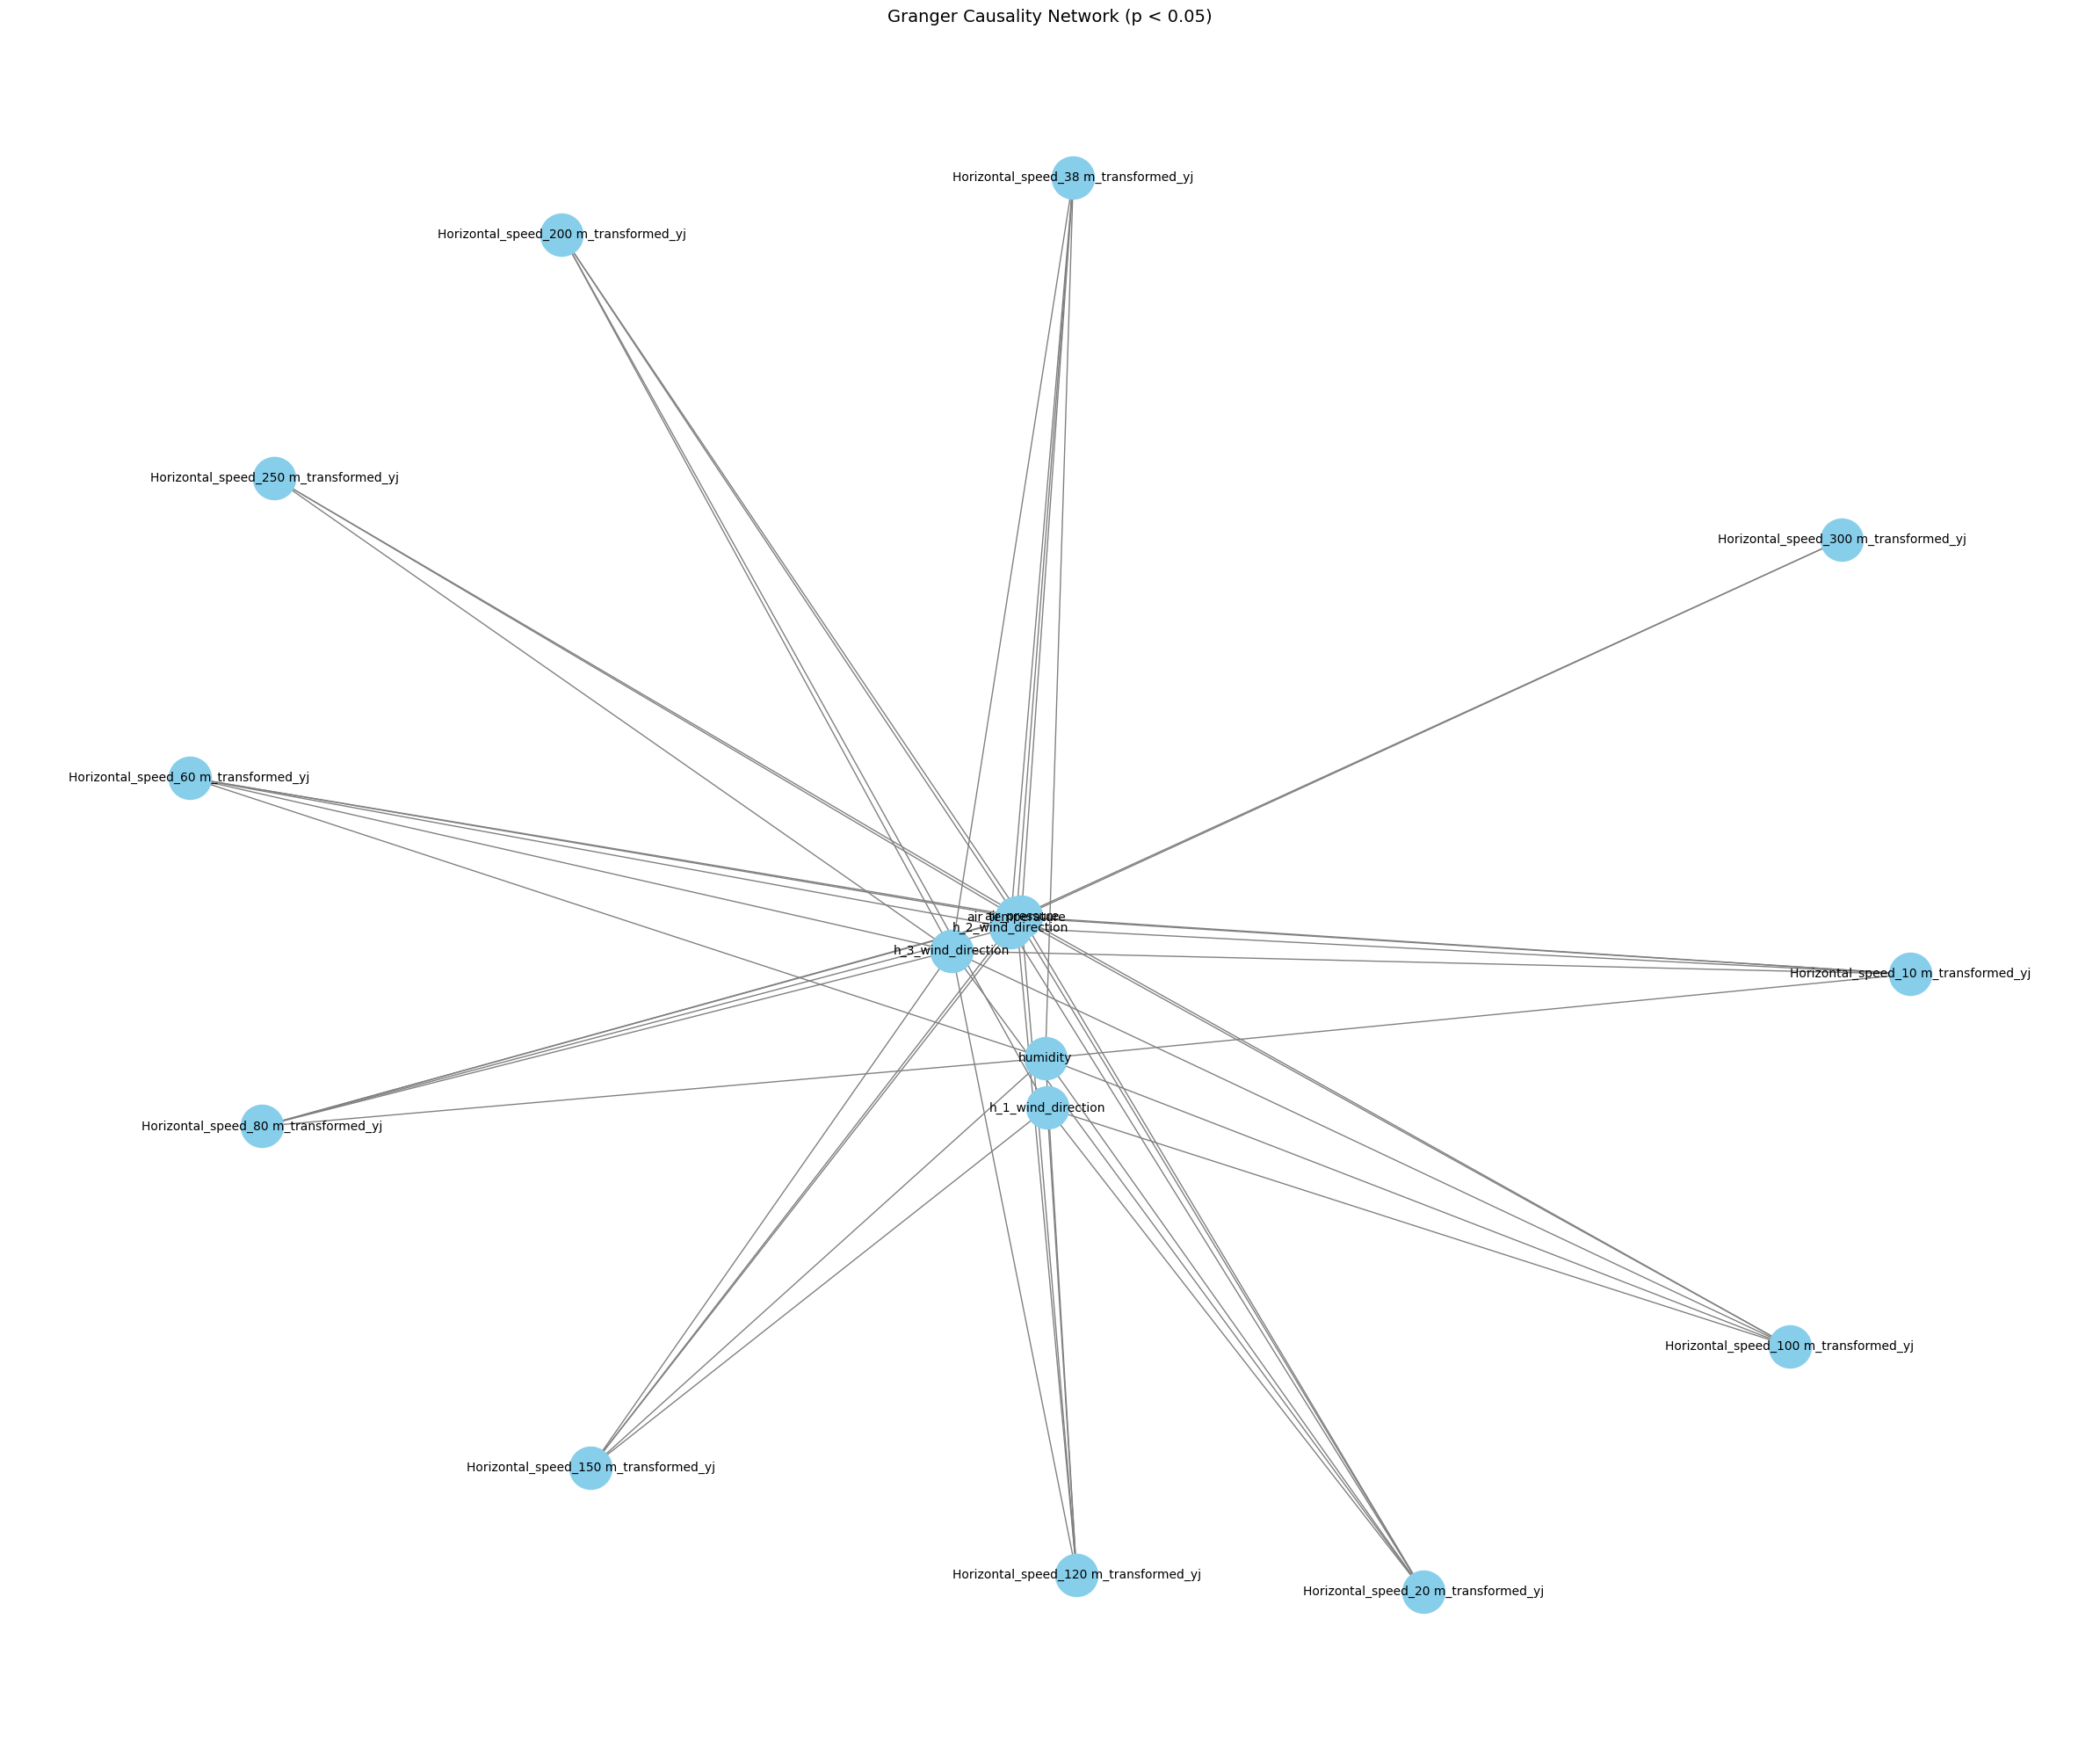

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize directed graph
G = nx.DiGraph()

# Add edges for significant Granger causality (p < 0.05)
for target, ranked in rankings.items():
    for cause, p_val in ranked.items():
        if p_val < 0.05:
            G.add_edge(cause, target, weight=1 - p_val)  # higher weight for lower p-value

# Draw the network
plt.figure(figsize=(24, 20))
pos = nx.spring_layout(G, k=0.2, seed=42)  # Layout for aesthetics

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color="skyblue")
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edges with arrows
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=15, edge_color="gray")

plt.title("Granger Causality Network (p < 0.05)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

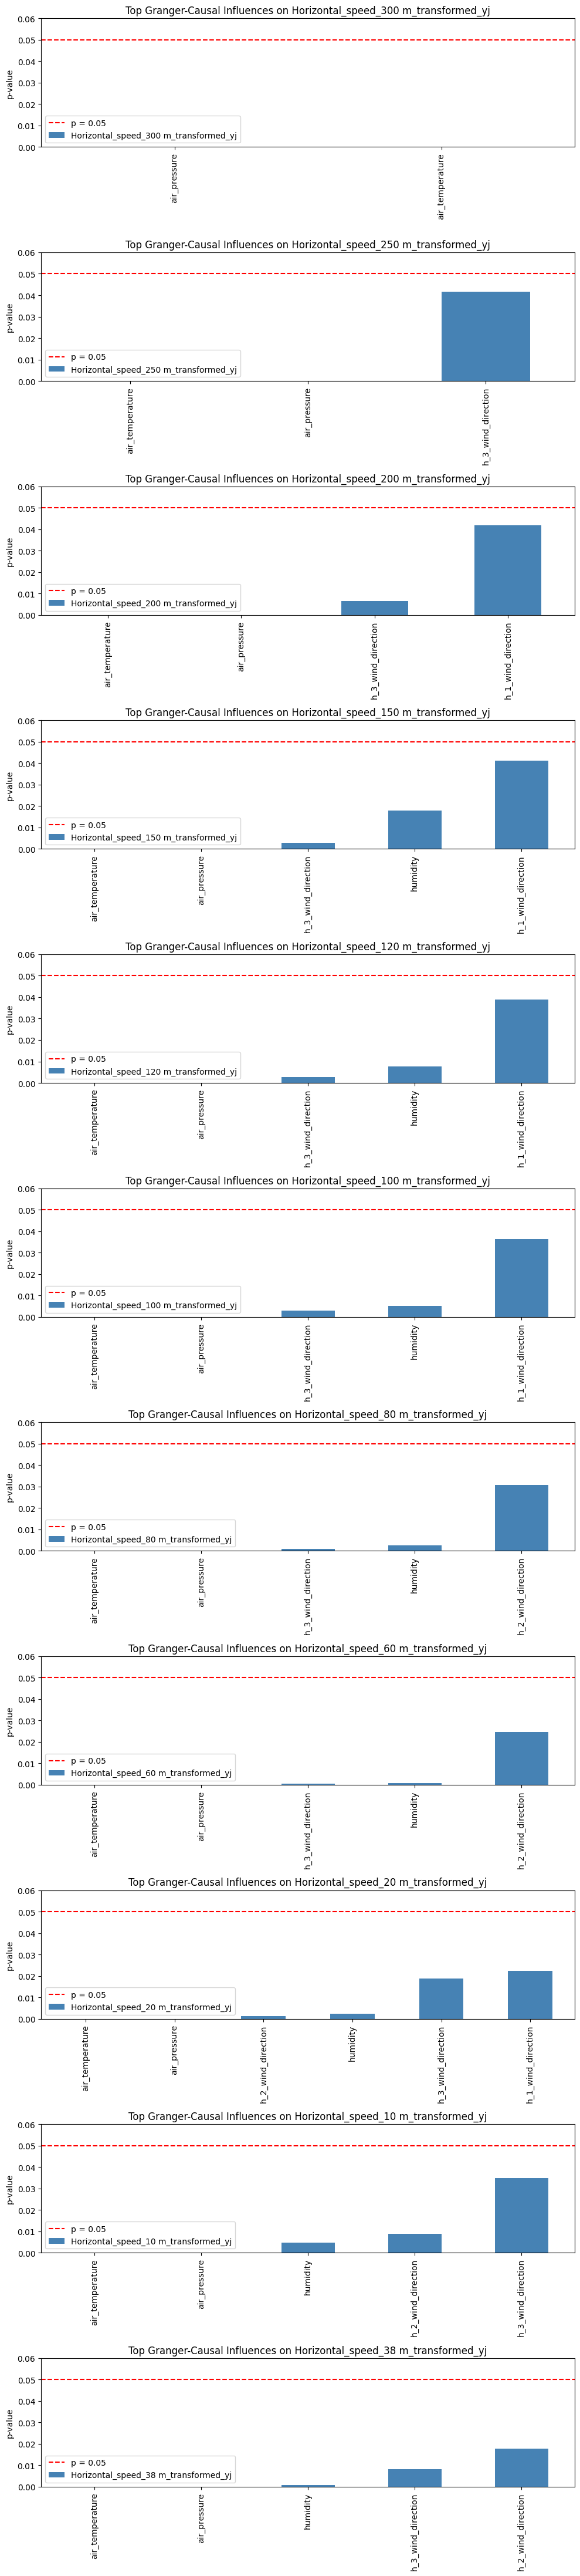

In [ ]:
import matplotlib.pyplot as plt

# Set figure size dynamically based on number of targets
n_targets = len(rankings)
fig, axes = plt.subplots(n_targets, 1, figsize=(10, 4 * n_targets))

if n_targets == 1:
    axes = [axes]  # make iterable if only one plot

# Plot for each target
for ax, (target, ranked) in zip(axes, rankings.items()):
    significant = ranked[ranked < 0.05]
    if significant.empty:
        ax.set_title(f"{target} (no significant influencers)")
        ax.axis('off')
        continue

    significant.plot(kind='bar', ax=ax, color='steelblue')
    ax.set_title(f"Top Granger-Causal Influences on {target}")
    ax.set_ylabel("p-value")
    ax.axhline(0.05, color='red', linestyle='--', label='p = 0.05')
    ax.legend()
    ax.set_ylim(0, 0.06)

plt.tight_layout()
plt.show()

# **HMM+Granger for Regime switch**

In [15]:
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
from statsmodels.tsa.vector_ar.var_model import VAR

# Step 1: Train HMM on the selected features
n_states = 3  # adjust as needed
hmm_data = df_selected.dropna().values

hmm = GaussianHMM(n_components=n_states, covariance_type='full', n_iter=100)
hmm.fit(hmm_data)

# Step 2: Predict latent states (regimes)
df_selected['regime'] = hmm.predict(hmm_data)

# Step 3: Granger causality per regime
def granger_matrix_hmm(df, regime_col='regime', maxlag=26):
    regimes = df[regime_col].unique()
    results = {}

    for reg in regimes:
        sub_df = df[df[regime_col] == reg].drop(columns=[regime_col])
        model = VAR(sub_df)
        var_res = model.fit(maxlags=maxlag, ic='aic')

        variables = sub_df.columns
        causing_vars = [col for col in variables if not col.endswith('_yj')]
        targets = [col for col in variables if col.endswith('_yj')]

        mat = pd.DataFrame(index=targets, columns=causing_vars)

        for caused in targets:
            for causing in causing_vars:
                if caused == causing:
                    mat.loc[caused, causing] = None
                    continue
                try:
                    test = var_res.test_causality(caused=caused, causing=causing, kind='f')
                    mat.loc[caused, causing] = test.pvalue
                except Exception as e:
                    mat.loc[caused, causing] = np.nan  # Handle potential test failure
        results[f'regime_{reg}'] = mat
    return results

# Run regime-specific Granger causality
gc_regime_results = granger_matrix_hmm(df_selected)

# Step 4: Display top influencers for each regime
p_value_threshold = 0.05
for regime, mat in gc_regime_results.items():
    print(f"\n=== {regime.upper()} ===")
    for target in mat.index:
        influences = mat.loc[target].dropna().sort_values()
        sig_influences = influences[influences < p_value_threshold]
        if not sig_influences.empty:
            print(f"\nTop influences on {target}:")
            print(sig_influences)
        else:
            print(f"\nNo significant influences found for {target}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



=== REGIME_1 ===

Top influences on Horizontal_speed_300 m_transformed_yj:
air_temperature           0.0
air_pressure              0.0
humidity                  0.0
h_3_wind_direction    0.04743
Name: Horizontal_speed_300 m_transformed_yj, dtype: object

Top influences on Horizontal_speed_250 m_transformed_yj:
air_temperature    0.0
air_pressure       0.0
humidity           0.0
Name: Horizontal_speed_250 m_transformed_yj, dtype: object

Top influences on Horizontal_speed_200 m_transformed_yj:
air_temperature            0.0
air_pressure               0.0
humidity                   0.0
h_3_wind_direction    0.044209
Name: Horizontal_speed_200 m_transformed_yj, dtype: object

Top influences on Horizontal_speed_150 m_transformed_yj:
air_temperature    0.0
humidity           0.0
air_pressure       0.0
Name: Horizontal_speed_150 m_transformed_yj, dtype: object

Top influences on Horizontal_speed_120 m_transformed_yj:
air_temperature    0.0
humidity           0.0
air_pressure       0.0
Name:

/tmp/ipython-input-20-1132965088.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


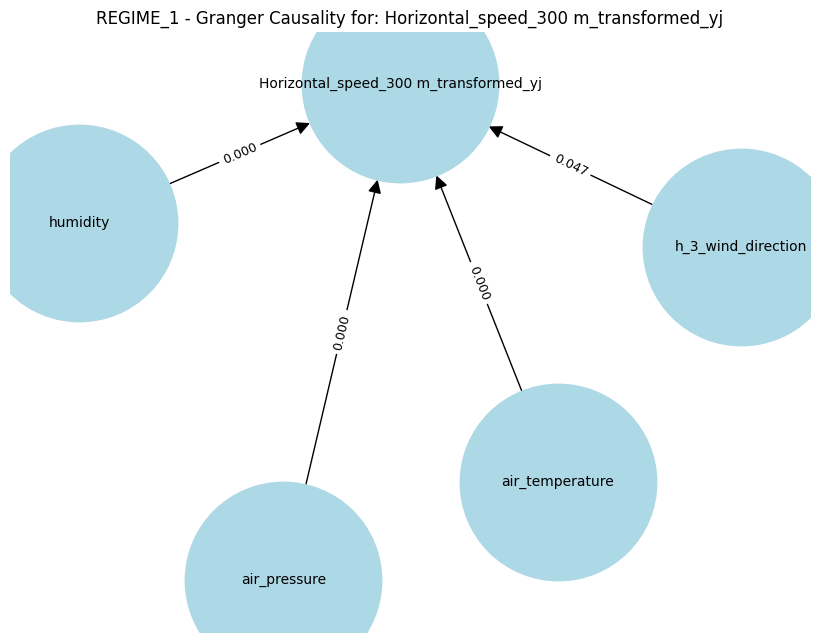

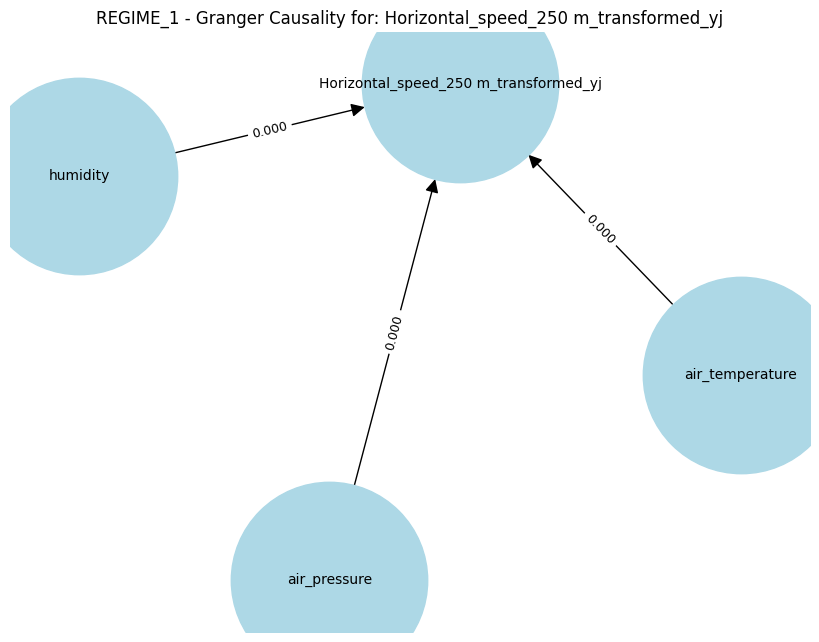

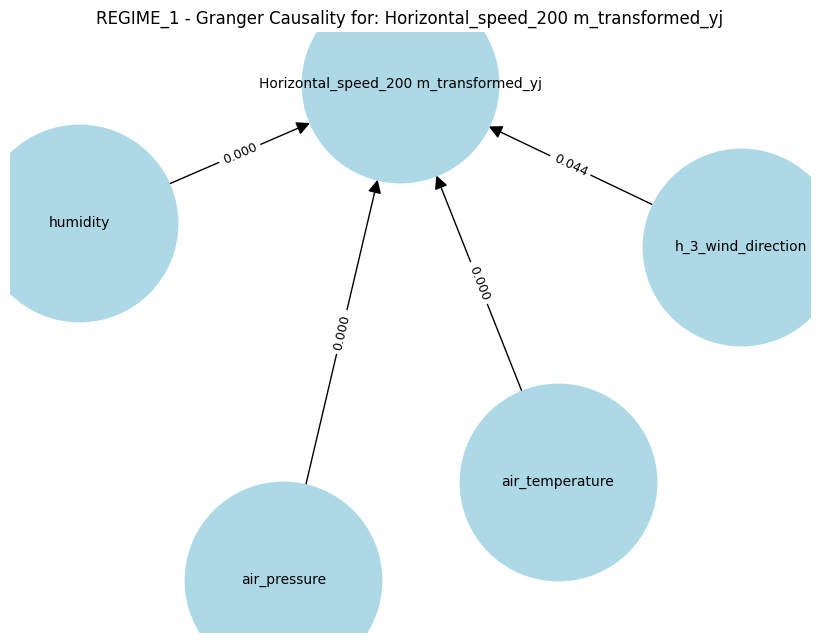

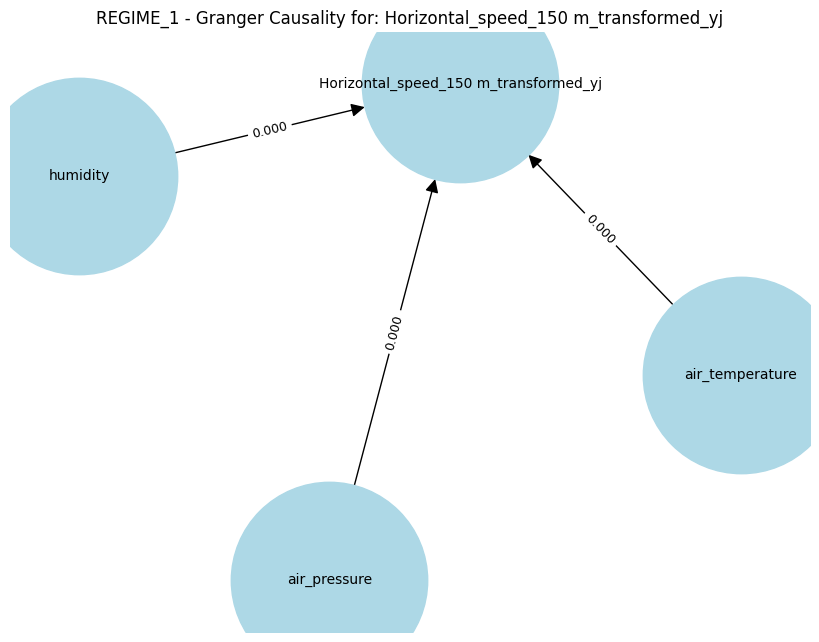

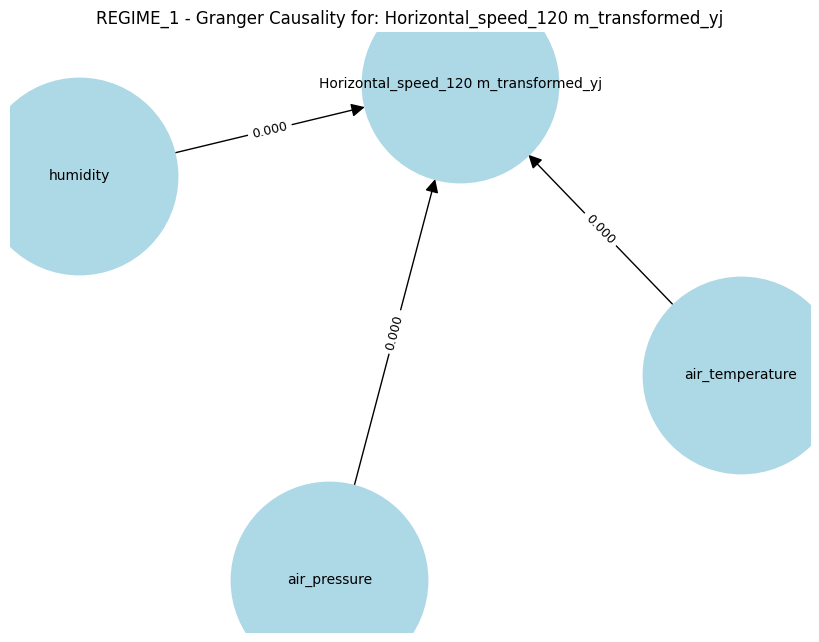

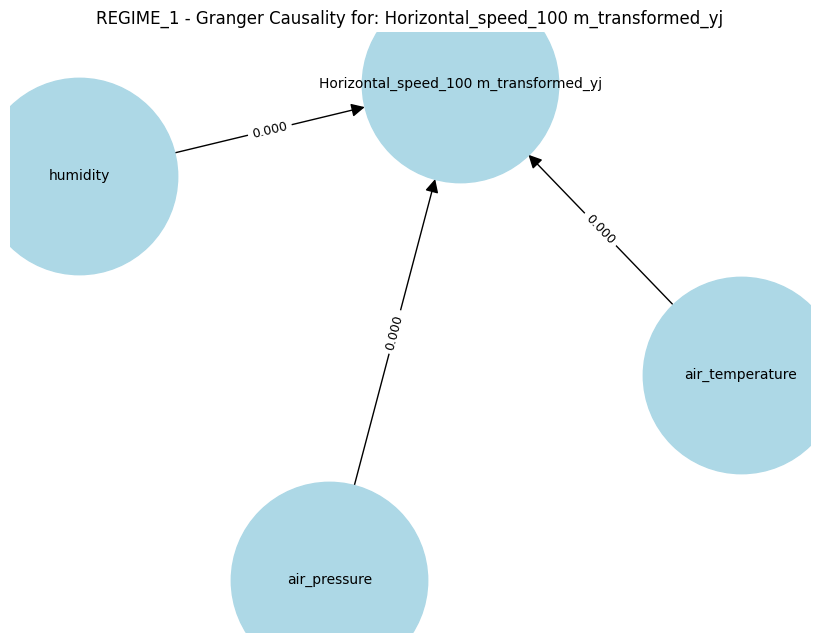

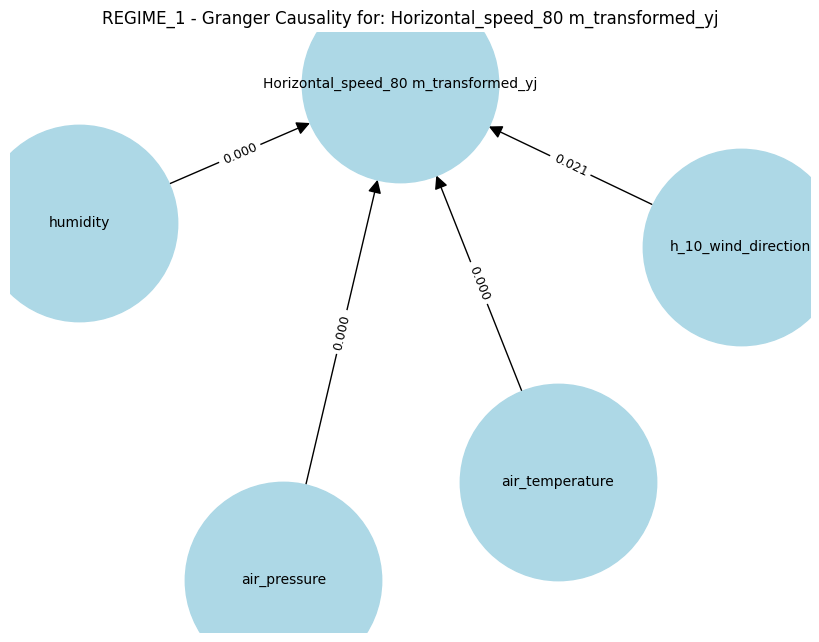

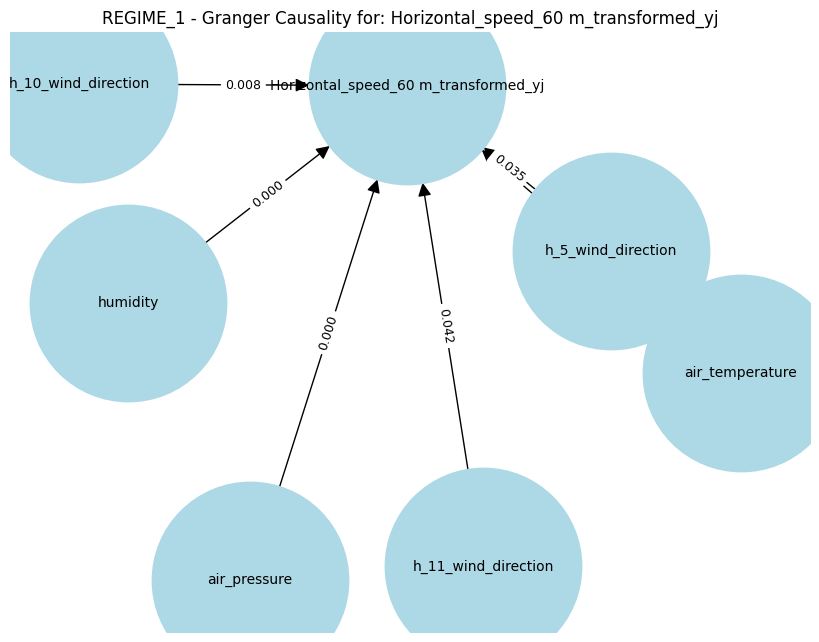

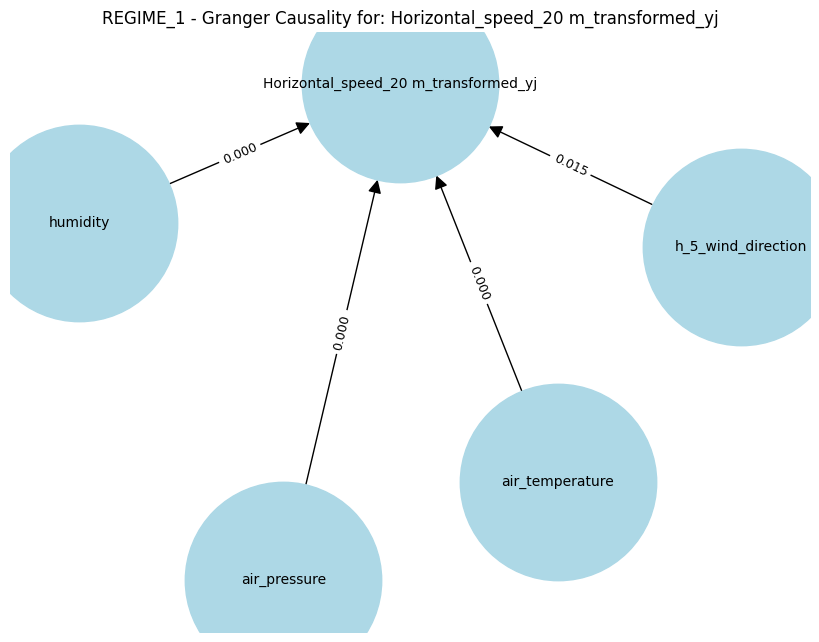

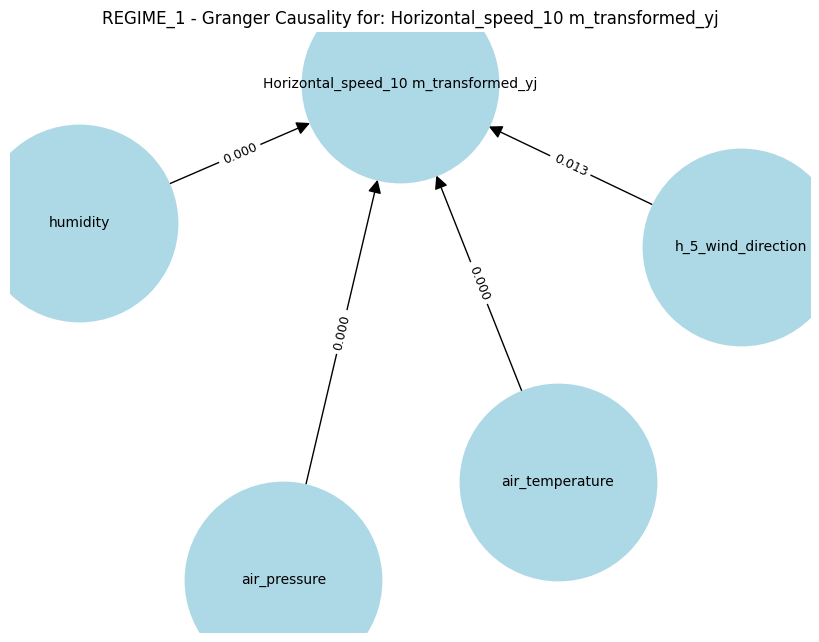

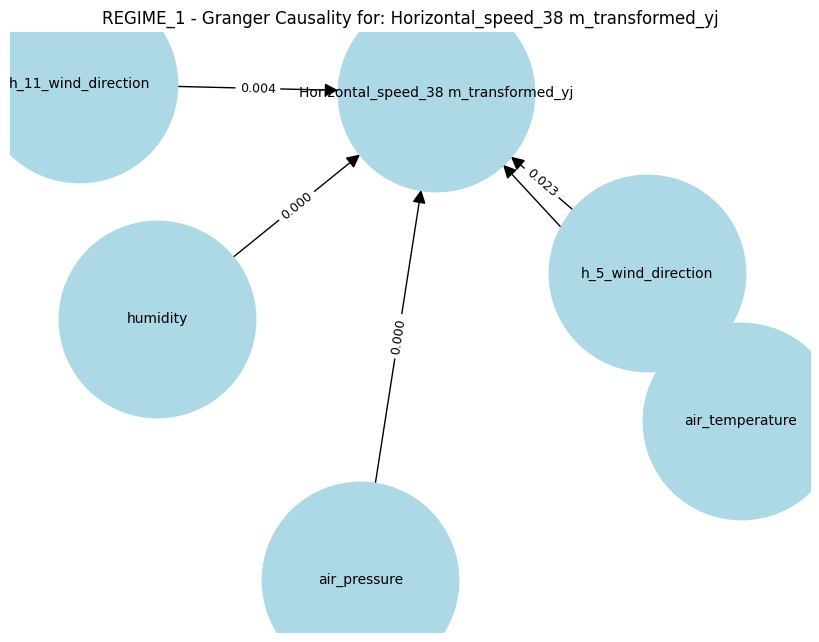

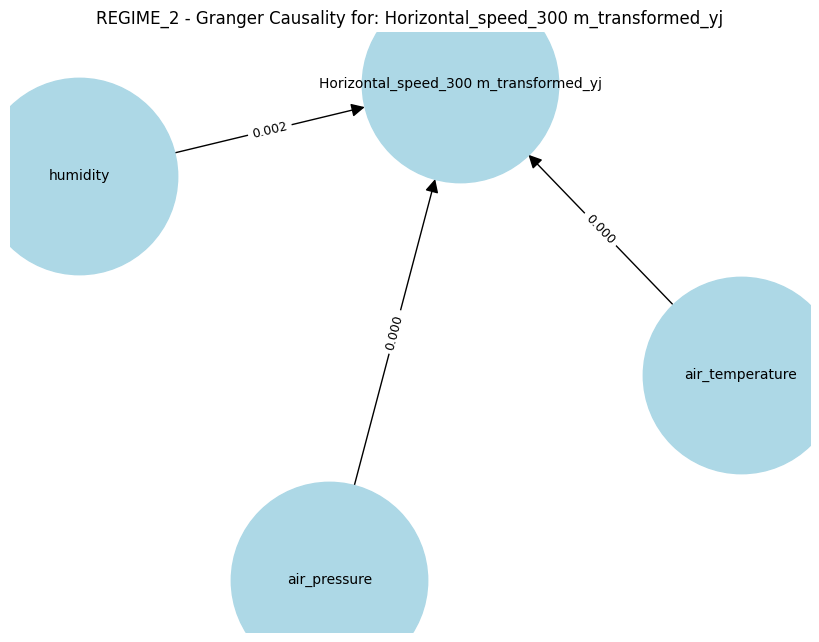

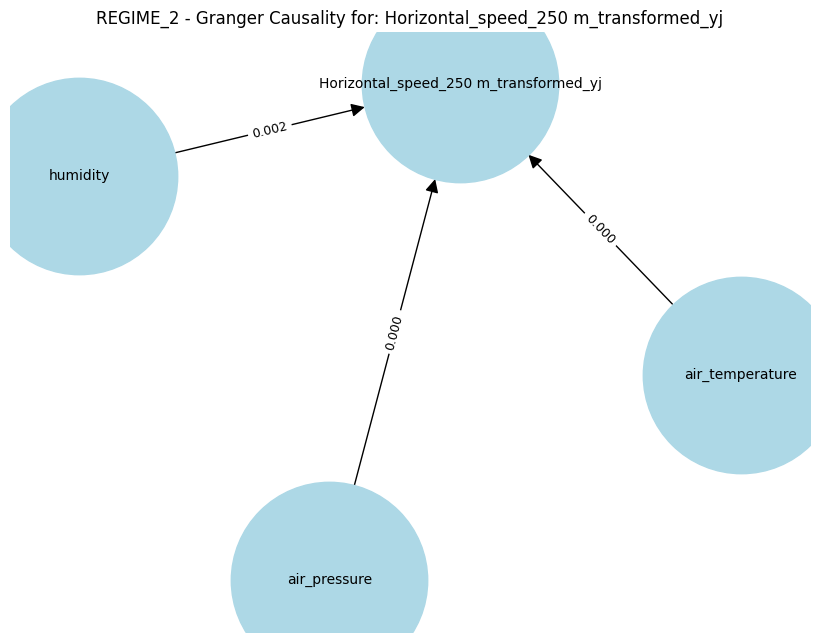

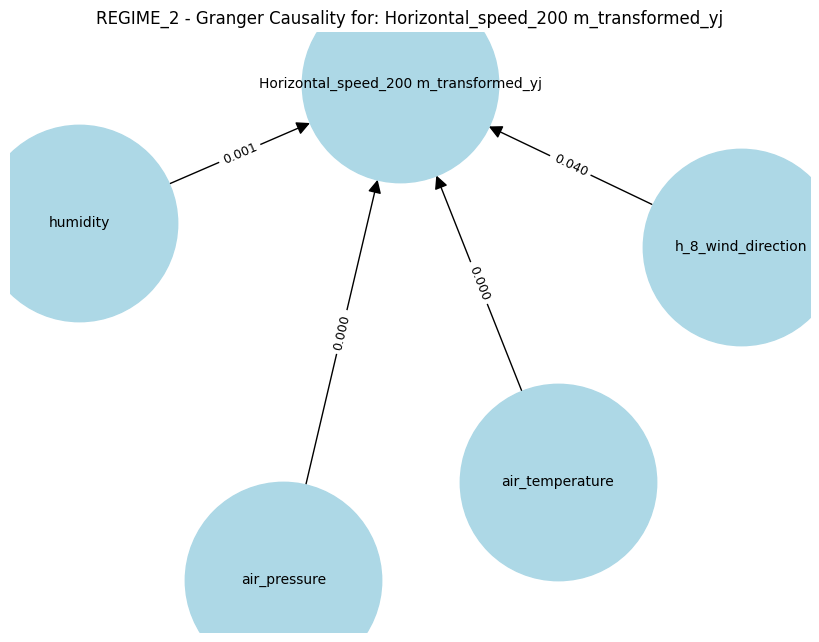

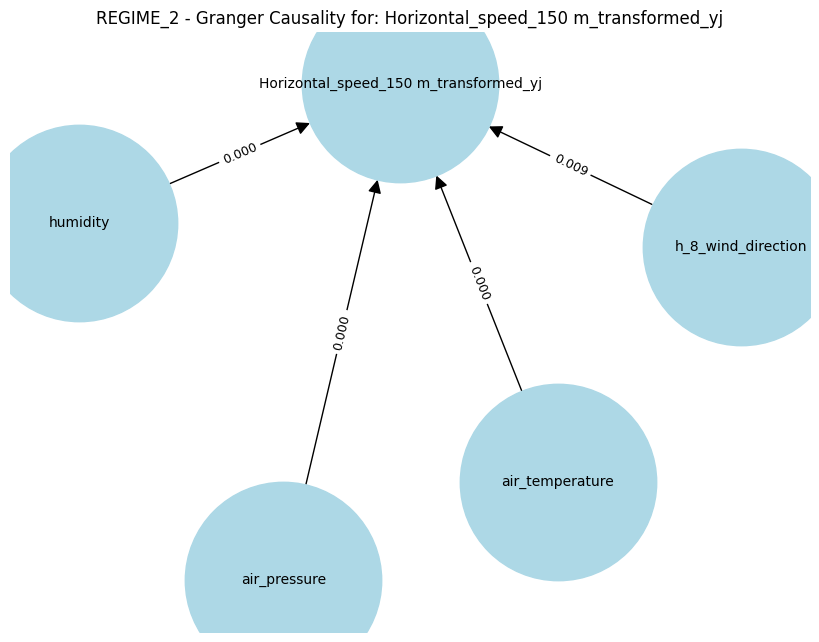

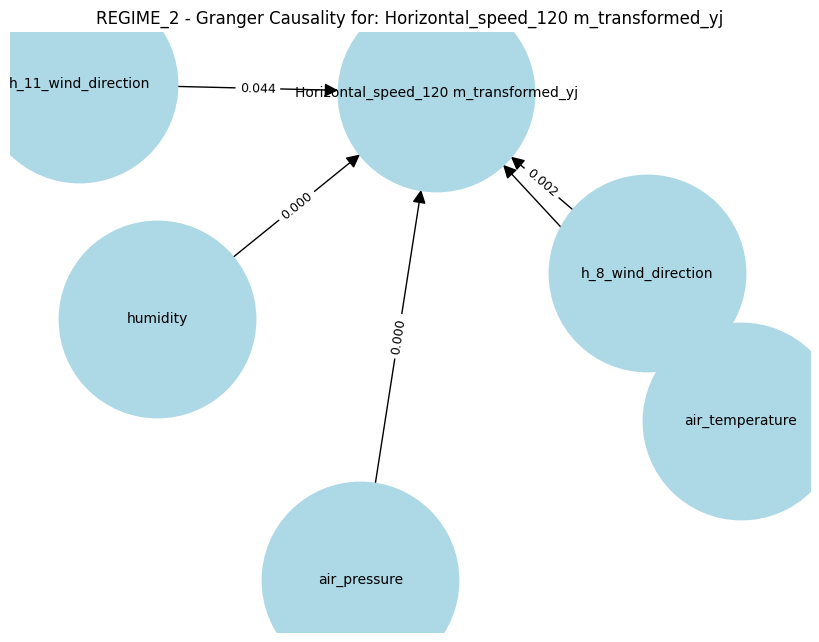

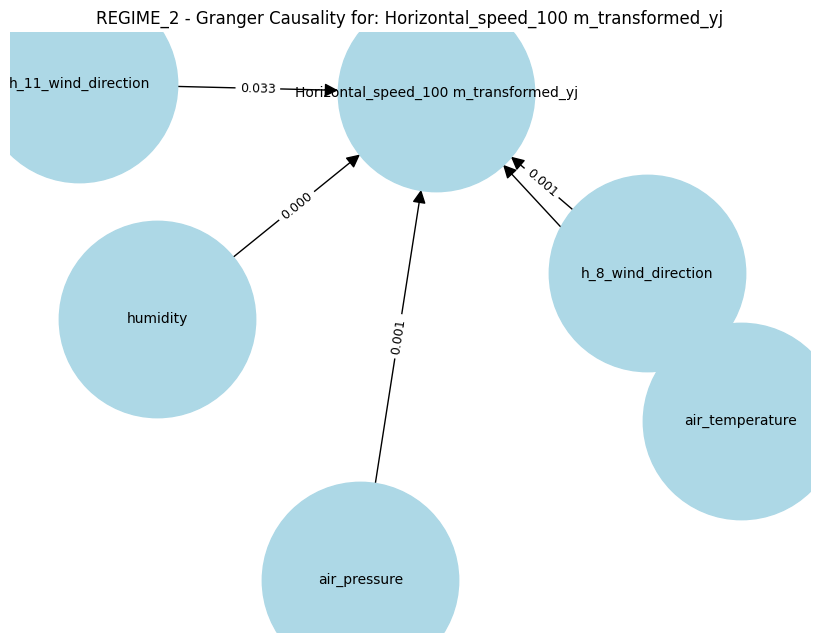

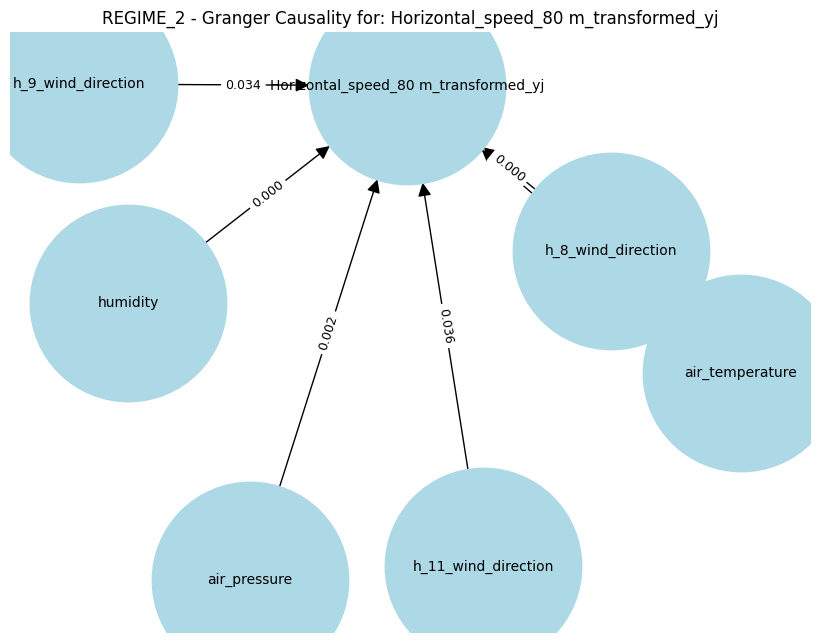

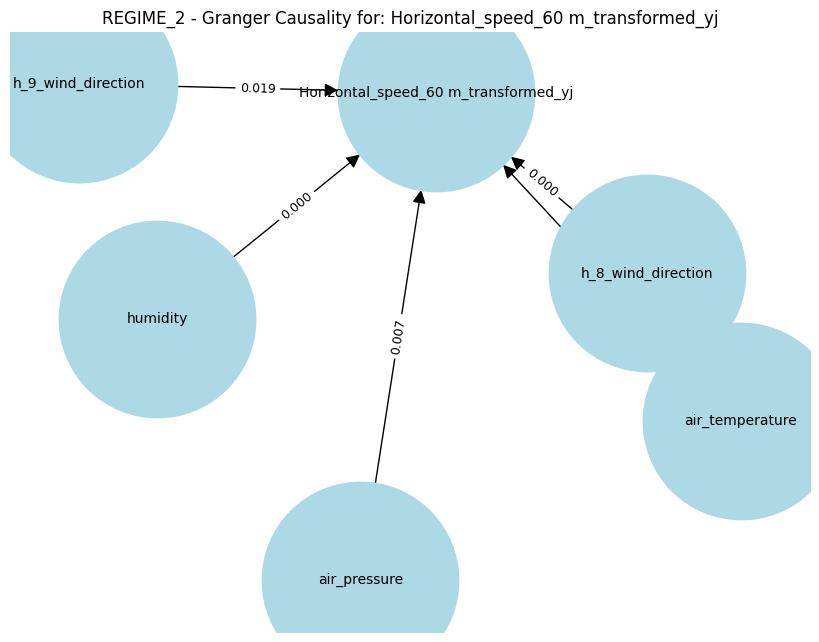

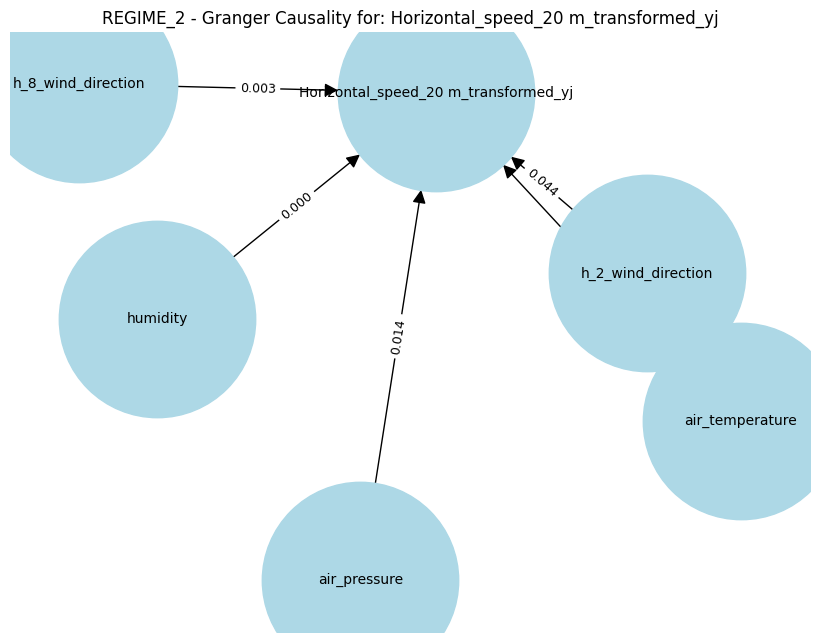

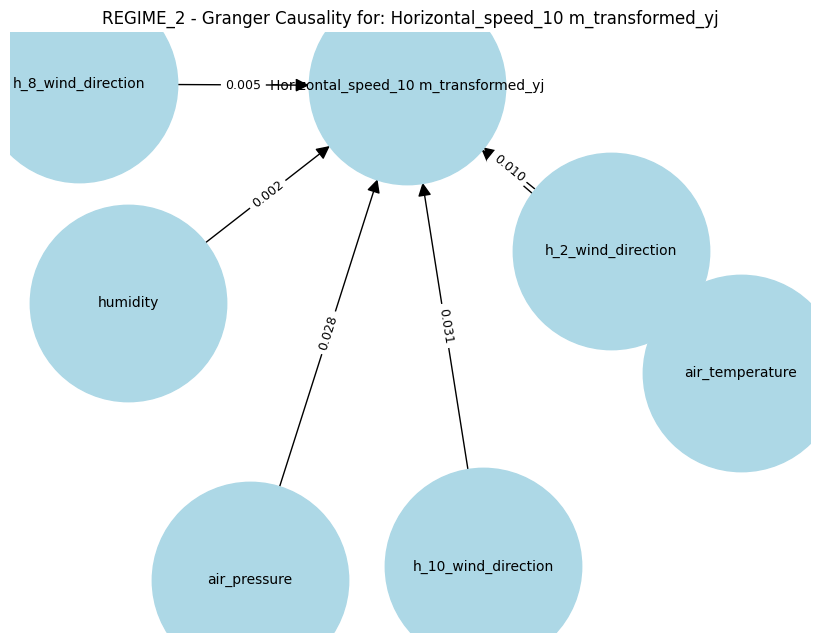

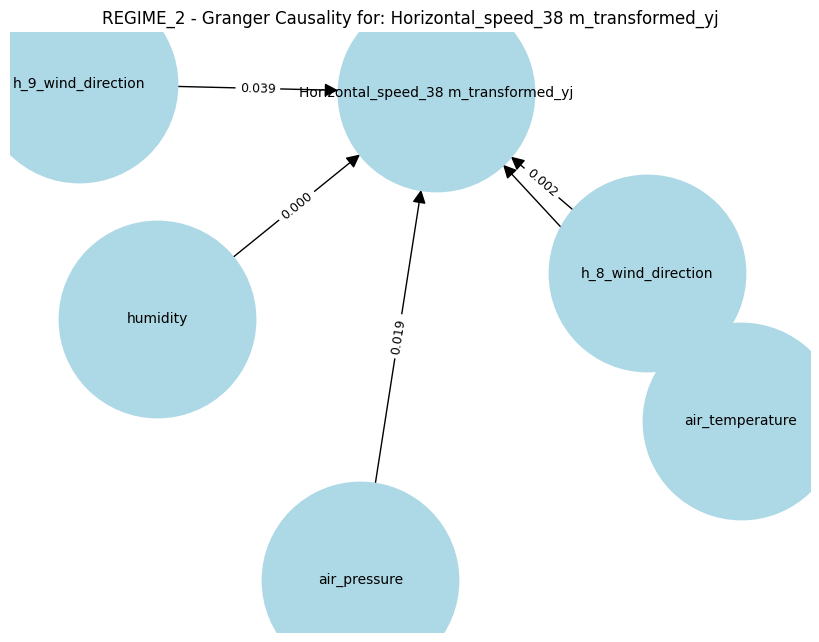

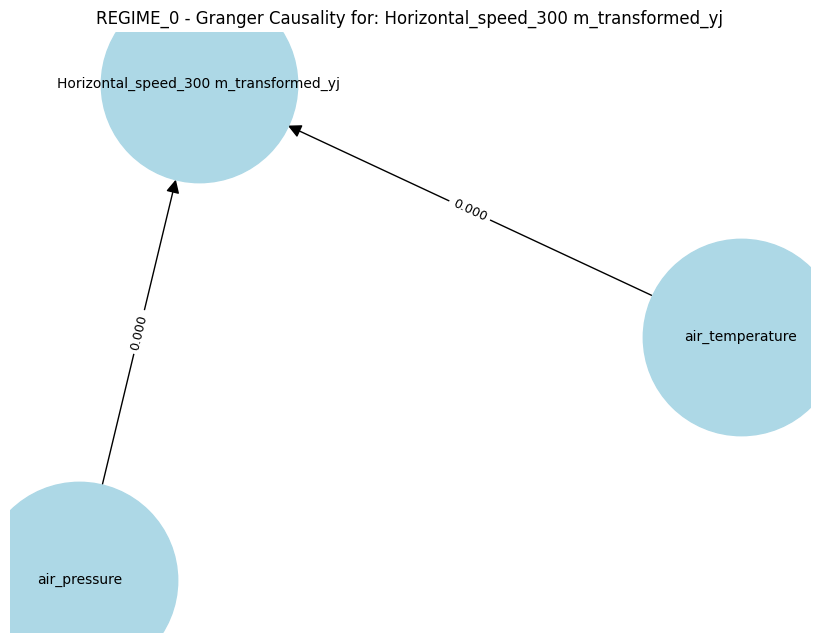

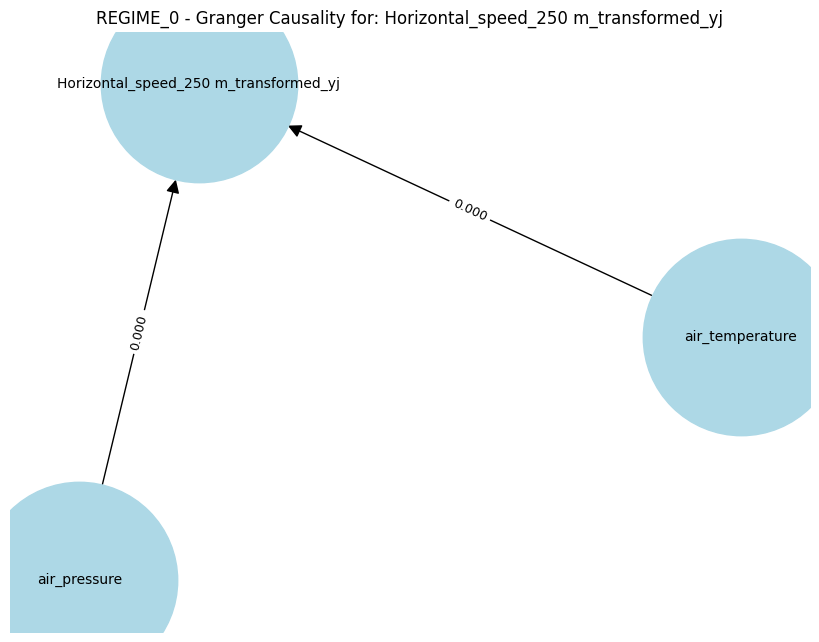

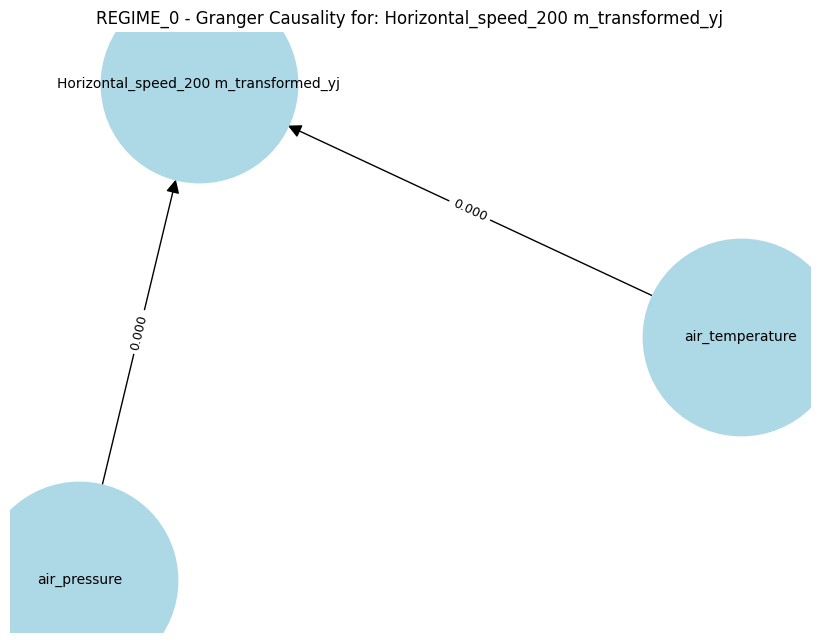

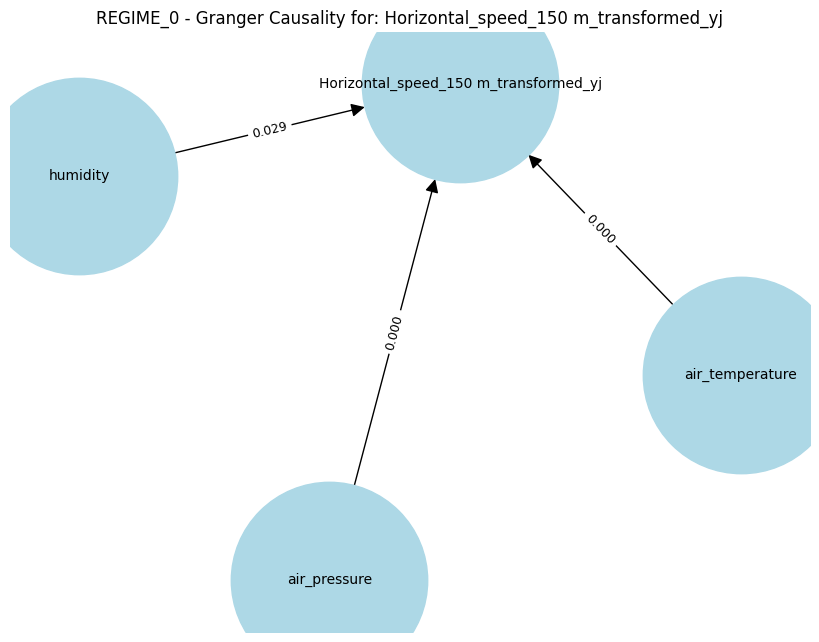

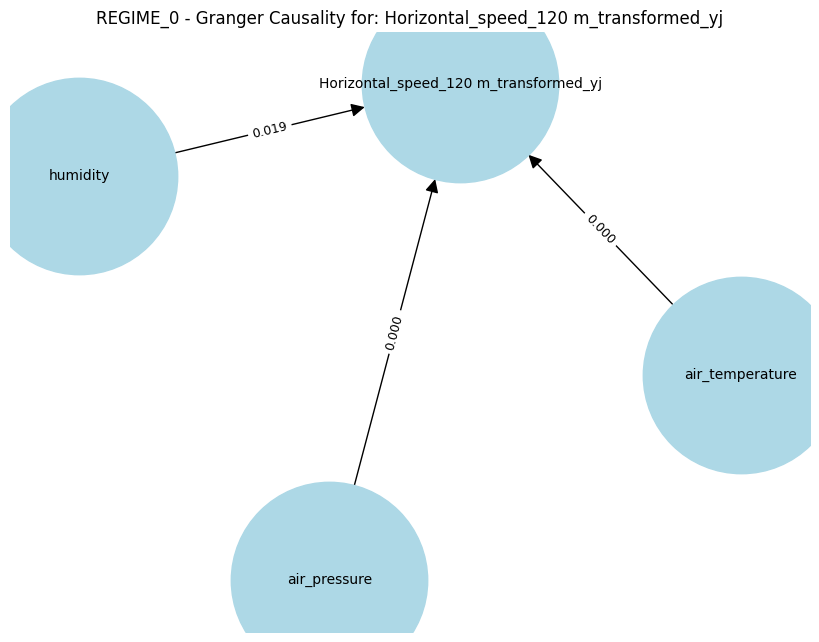

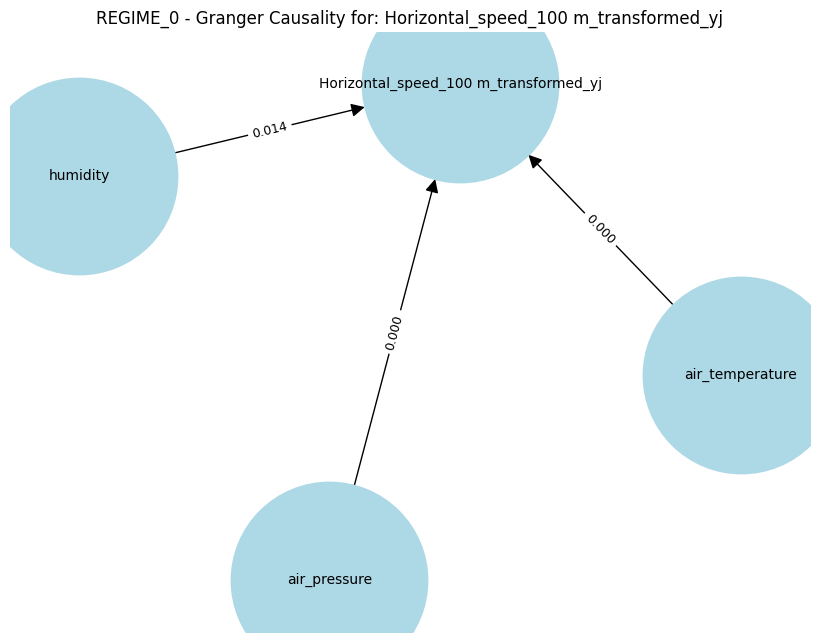

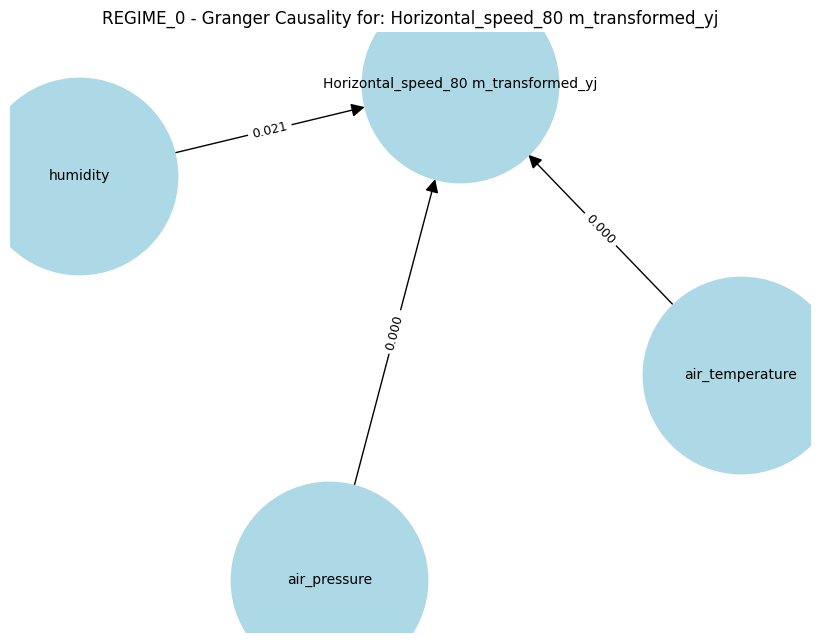

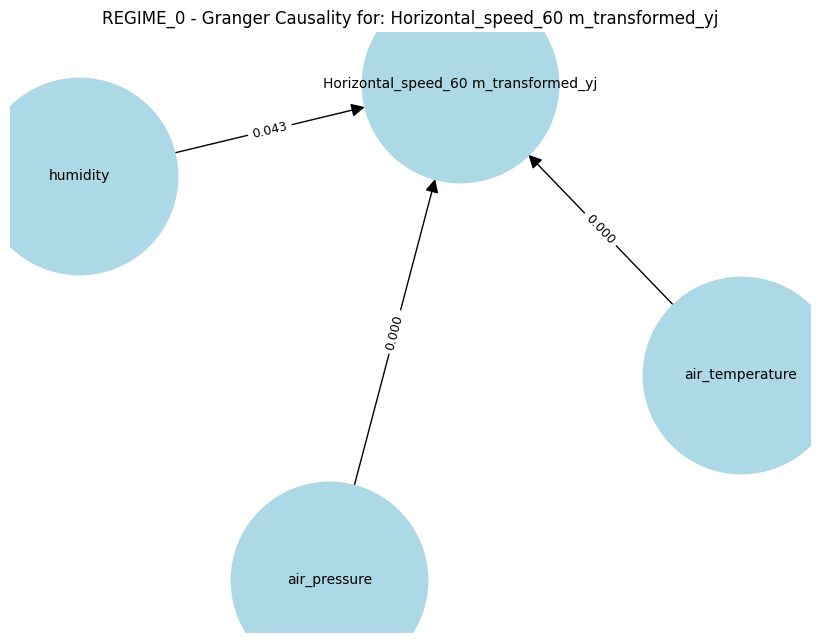

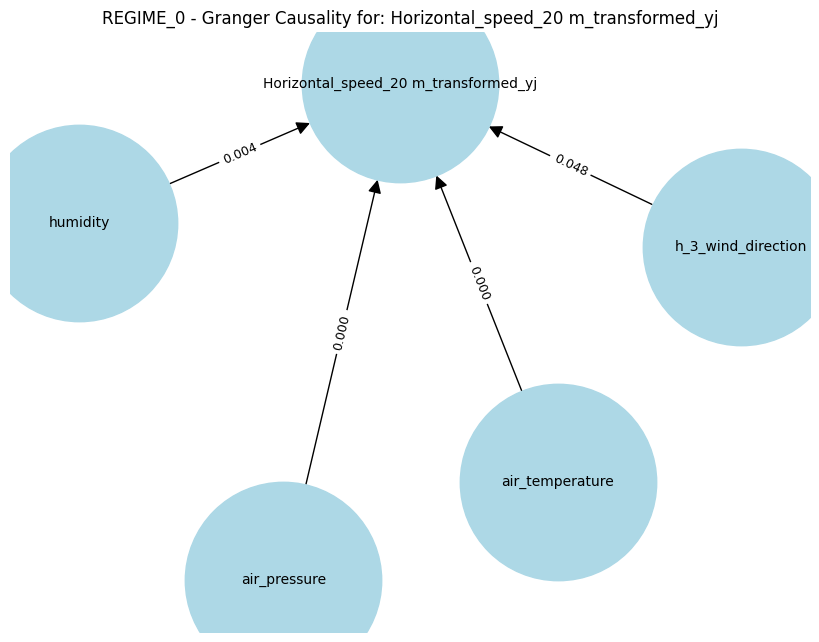

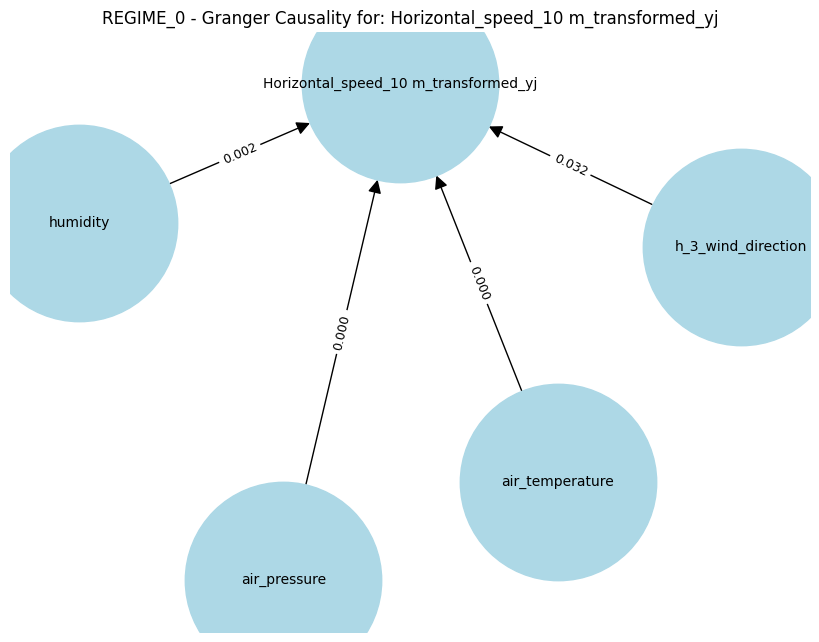

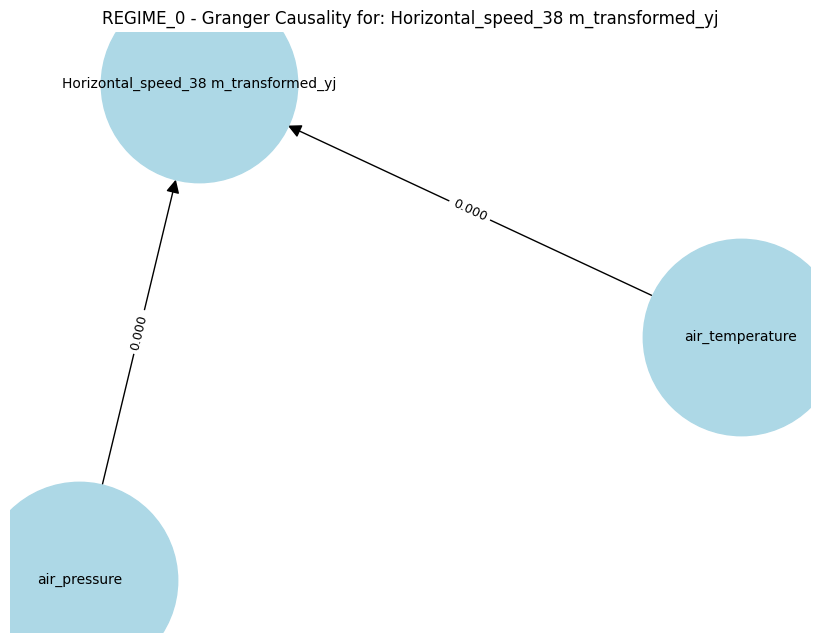

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_granger_graphs_per_target(granger_results, p_threshold=0.05):
    for regime, mat in granger_results.items():
        for target in mat.index:
            G = nx.DiGraph()
            influences = mat.loc[target].dropna()

            # Filter by significance threshold
            sig_influences = influences[influences < p_threshold]
            if sig_influences.empty:
                print(f"No significant influencers for {target} in {regime}")
                continue

            # Build graph
            G.add_node(target)
            for cause, pval in sig_influences.items():
                G.add_node(cause)
                G.add_edge(cause, target, label=f"{pval:.3f}")

            # Plot graph
            plt.figure(figsize=(8, 6))
            pos = nx.spring_layout(G, seed=42)

            nx.draw(G, pos, with_labels=True, node_color="lightblue",
                    node_size=20000, font_size=10, arrowsize=20)

            # Draw edge labels (p-values)
            edge_labels = nx.get_edge_attributes(G, 'label')
            nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                                         font_size=9, label_pos=0.5)

            plt.title(f"{regime.upper()} - Granger Causality for: {target}", fontsize=12)
            plt.axis("off")
            plt.tight_layout()
            plt.show()

# Run the visualization
draw_granger_graphs_per_target(gc_regime_results, p_threshold=0.05)

# **Dynamic Basian Network**

In [19]:
import pandas as pd
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator
from pgmpy.inference import DBNInference
from pgmpy.estimators.StructureScore import K2
from pgmpy.estimators import BayesianEstimator, HillClimbSearch
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Regime-based segmentation (use your existing HMM-based 'regime' column)
# Assume df_selected has a 'regime' column from HMM

def train_dbn_per_regime(df, regime_col='regime'):
    regimes = df[regime_col].unique()
    dbn_models = {}

    for reg in regimes:
        print(f"\nTraining DBN for Regime {reg}...")
        df_reg = df[df[regime_col] == reg].drop(columns=[regime_col])

        # Optional: scale data for numerical stability
        scaler = StandardScaler()
        df_scaled = pd.DataFrame(scaler.fit_transform(df_reg), columns=df_reg.columns)

        # Prepare time-sliced dataset: t and t+1
        data_t = df_scaled.iloc[:-1].copy()
        data_t.columns = [f"{c}_t" for c in data_t.columns]
        data_t1 = df_scaled.iloc[1:].copy()
        data_t1.columns = [f"{c}_t+1" for c in data_t1.columns]

        df_timesliced = pd.concat([data_t.reset_index(drop=True), data_t1.reset_index(drop=True)], axis=1)

        # Structure learning using Hill Climb Search
        # Pass scoring_method directly to HillClimbSearch
        hc = HillClimbSearch(df_timesliced, get_scoring_method=K2(df_timesliced))
        best_model = hc.estimate()

        dbn_model = DBN()
        for edge in best_model.edges():
            # Split nodes into time slices
            if "_t+1" in edge[1] and "_t" in edge[0]:
                dbn_model.add_edge(edge[0].replace("_t", ""), edge[1].replace("_t+1", ""))

        dbn_model.fit(df_timesliced, estimator=MaximumLikelihoodEstimator)
        dbn_models[f"regime_{reg}"] = dbn_model

    return dbn_models

# Train regime-specific DBNs
dbn_models = train_dbn_per_regime(df_selected)

# Visualize learned structure per regime
for regime, model in dbn_models.items():
    print(f"\n{regime.upper()} Structure:")
    print(model.edges())


Training DBN for Regime 1...


TypeError: BaseEstimator.__init__() got an unexpected keyword argument 'get_scoring_method'